In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from scipy.stats import zscore 

Using TensorFlow backend.


In [2]:
df = pd.read_csv('/Users/tybillchou/Documents/projectpm25/pm25/new/lt_106107_pm25_comp.csv',encoding='utf-8')

In [3]:
df

,Unnamed: 0,ID,station,Year,Month,Day,Time,AMB_TEMP,CO,NO,...,O3,PM10,PM2.5,RAINFALL,RH,SO2,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR
0,0,lt2017010100,龍潭,2017,1,1,0,18,0.20,0,...,34,25,16,0,77,2,東北,東,緩風,緩風
1,1,lt2017010101,龍潭,2017,1,1,1,18,0.22,0,...,33,20,13,0,79,1,東北,東,微風,微風
2,2,lt2017010102,龍潭,2017,1,1,2,18,0.23,0,...,31,23,16,0,80,1,東,東北,微風,微風
3,3,lt2017010103,龍潭,2017,1,1,3,17,0.28,0,...,26,25,9,0,82,1,西北,西南,微風,微風
4,4,lt2017010104,龍潭,2017,1,1,4,17,0.31,1,...,25,29,17,0,84,1,東北,東北,微風,無風
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17512,17512,lt2018123116,龍潭,2018,12,31,16,15,0.24,1,...,34,10,13,0,95,2,東北,東北,緩風,緩風
17513,17513,lt2018123117,龍潭,2018,12,31,17,15,0.24,1,...,34,11,17,0,95,2,東北,東北,緩風,緩風
17514,17514,lt2018123118,龍潭,2018,12,31,18,15,0.25,1,...,33,8,13,0,95,1,東北,東北,緩風,緩風
17515,17515,lt2018123119,龍潭,2018,12,31,19,15,0.22,1,...,34,6,4,0,95,2,東北,東北,緩風,緩風


In [4]:
df['WD_HR'].replace({'東':0,'東南':1,'南':2,'西南':3,'西':4,'西北':5,'北':6,'東北':7},inplace=True)
df['WIND_DIREC'].replace({'東':0,'東南':1,'南':2,'西南':3,'西':4,'西北':5,'北':6,'東北':7},inplace=True)
df['WIND_SPEED'].replace({'無風':0,'微風':1,'緩風':2,'勁風':3},inplace=True)
df['WS_HR'].replace({'無風':0,'微風':1,'緩風':2,'勁風':3},inplace=True)

In [5]:
WD_HR_OHE = pd.get_dummies(df['WD_HR'],prefix=['WD_HR_OHE'])
WIND_DIREC_OHE = pd.get_dummies(df['WIND_DIREC'],prefix=['WIND_DIREC_OHE'])

In [6]:
df_OHE = pd.concat([df, WD_HR_OHE,WIND_DIREC_OHE], axis=1)

In [7]:
df_OHE.drop(df_OHE.columns[[0,1,2,3,4,5,6,19,20]], axis = 1, inplace = True) 

In [8]:
x = df_OHE.iloc[:,[0,1,2,3,4,5,6,10,11]]

In [9]:
x=np.array(x).astype(float)
x_nor=(x-x.min(axis=0))/(x.max(axis=0)-x.min(axis=0))

In [10]:
# x=np.array(x).astype(float)
# from scipy.stats import zscore
# z_score = zscore(x)

In [11]:
x_OHE = df_OHE.iloc[:,12:]

In [12]:
x_final = np.concatenate((x_nor, x_OHE), axis=1)

In [13]:
x_final

array([[0.43902439, 0.01949318, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.43902439, 0.0214425 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.43902439, 0.02241715, 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.36585366, 0.02436647, 0.05882353, ..., 0.        , 0.        ,
        1.        ],
       [0.36585366, 0.0214425 , 0.05882353, ..., 0.        , 0.        ,
        1.        ],
       [0.36585366, 0.01851852, 0.05882353, ..., 0.        , 0.        ,
        1.        ]])

In [14]:
x_final.shape

(17517, 23)

In [15]:
def creat_dataset(ds, look_back=1):
    x_data = []
    for i in range(len(ds[:-1])-(look_back-1)):
        tmp = []
        for j in range(look_back):
            tmp+=list(ds[i+j])
        x_data.append(tmp)        
#         y_data.append(ds[i+look_back, 0])
    return np.array(x_data)# , np.array(y_data)

In [16]:
look_back = 8 
x_train = creat_dataset(x_final, look_back)
print('過去時數:', look_back)
print('x_train shape:', x_train.shape)

過去時數: 8
x_train shape: (17509, 184)


In [17]:
x_train.shape

(17509, 184)

In [18]:
y = df_OHE.iloc[:,6]

In [19]:
y

0        16
1        13
2        16
3         9
4        17
         ..
17512    13
17513    17
17514    13
17515     4
17516     1
Name: PM2.5, Length: 17517, dtype: int64

In [20]:
#將y(pm2.5)分成10個等級
y1 = []                
for i in y:
    if i<=11:
        y1.append(0)
    elif 11<i<=23:
        y1.append(1)
    elif 23<i<=35:
        y1.append(2)
    elif 36<i<=41:
        y1.append(3)
    elif 41<i<=47:
        y1.append(4)
    elif 47<i<=53:
        y1.append(5)
    elif 53<i<=58:
        y1.append(6)
    elif 58<i<=64:
        y1.append(7)
    elif 64<i<=70:
        y1.append(8)
    else:
        y1.append(9)
y1 = np.array(y1)

In [21]:
y1.shape

(17517,)

In [22]:
y1

array([1, 1, 1, ..., 1, 0, 0])

In [23]:
#將10類的標籤y,轉換成one-hot encoding編碼
from keras.utils import np_utils
y2 = np_utils.to_categorical(y1,10)

In [24]:
#每8筆資料對上一比標籤y,所以從第9比開始
y_train=y2[8:]

In [25]:
y_train.shape

(17509, 10)

In [26]:
17508*0.8

14006.400000000001

In [27]:
#分成訓練集和測試集
x_tr, y_tr = x_train[0:14006], y_train[0:14006]
x_test, y_test = x_train[14006:], y_train[14006:]

In [36]:
#定義模型
model = Sequential() #建立Sequential()物件
model.add(Dense(184, input_shape=(184,),activation='relu')) #add函式新增神經層,Dense為全連接層,16為神經元數,input_shape為輸入資料,activation為啟動函數,參考https://keras.io/activations/
# tf.keras.layers.Dropout(0.2)
model.add(Dense(200, activation='relu'))
# tf.keras.layers.Dropout(0.2)
model.add(Dense(100, activation='relu'))
# tf.keras.layers.Dropout(0.2)
# model.add(Dense(60, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(10, activation='softmax')) 


In [37]:
model.summary() #模型摘要資訊

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 184)               34040     
_________________________________________________________________
dense_7 (Dense)              (None, 200)               37000     
_________________________________________________________________
dense_8 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_9 (Dense)              (None, 30)                3030      
_________________________________________________________________
dense_10 (Dense)             (None, 10)                310       
Total params: 94,480
Trainable params: 94,480
Non-trainable params: 0
_________________________________________________________________


In [38]:
from keras import optimizers

In [39]:
model.compile(loss = 'categorical_crossentropy',optimizer = optimizers.Adam(learning_rate = 0.0005),metrics = ['accuracy'])
#compile()函式可以編譯模型,loss為損失函數,optimizer為優化器,

In [32]:
#訓練模型fit()函式,x2_train為訓練特徵資料,y2_train為訓練標籤資料,epochs為訓練週期次數,shuffle為隨機,batch_size為批次樣本數(一次多少筆資料)
history = model.fit(x_tr, y_tr,
                    validation_split=0.2,
                    batch_size = 100,
                    shuffle = True,
                    epochs=5,)  

Train on 11204 samples, validate on 2802 samples
Epoch 1/5
11204/11204 [==============================] - 1s 49us/step - loss: 1.4972 - accuracy: 0.4287 - val_loss: 1.2155 - val_accuracy: 0.4897
Epoch 2/5
11204/11204 [==============================] - 0s 36us/step - loss: 1.1433 - accuracy: 0.5332 - val_loss: 1.1670 - val_accuracy: 0.5403
Epoch 3/5
11204/11204 [==============================] - 0s 30us/step - loss: 1.0372 - accuracy: 0.5725 - val_loss: 1.1144 - val_accuracy: 0.5425
Epoch 4/5
11204/11204 [==============================] - 0s 30us/step - loss: 0.9813 - accuracy: 0.5965 - val_loss: 1.1212 - val_accuracy: 0.5393
Epoch 5/5
11204/11204 [==============================] - 0s 35us/step - loss: 0.9400 - accuracy: 0.6112 - val_loss: 1.0614 - val_accuracy: 0.5589


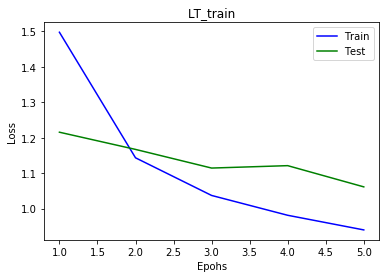

In [35]:
import matplotlib.pyplot as plt
loss = history.history['loss']
epochs = range(1, len(loss)+1)
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b-',label='Train')
plt.plot(epochs, val_loss,'g-',label='Test')
plt.title('LT_train')
plt.xlabel('Epohs')
plt.ylabel('Loss')
plt.legend()
plt.show()

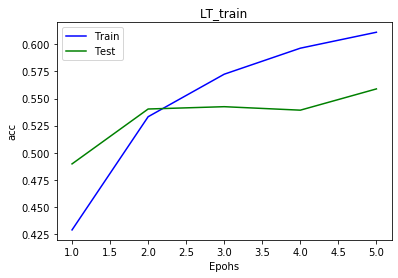

In [34]:
acc = history.history['accuracy']
epochs = range(1, len(acc)+1)
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'b-',label='Train')
plt.plot(epochs, val_acc,'g-',label='Test')
plt.title('LT_train')
plt.xlabel('Epohs')
plt.ylabel('acc')
plt.legend()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(x_tr,y_tr)
print('訓練資料集準確度:',accuracy,'Loss:',loss)

## loss 損失函數,越小越好
## accuracy 準確率

In [64]:
loss_a, accuracy_a = model.evaluate(x2_train, y2_train)
loss_t, accuracy_t = model.evaluate(x2_test, y2_test)

NameError: name 'x2_train' is not defined

In [40]:
history = model.fit(x_tr, y_tr,
                    validation_data = (x_test, y_test),
                    batch_size = 100,
                    shuffle = True,
                    epochs=10,)

Train on 14006 samples, validate on 3503 samples
Epoch 1/10
14006/14006 [==============================] - 1s 42us/step - loss: 1.4182 - accuracy: 0.4593 - val_loss: 1.0961 - val_accuracy: 0.5615
Epoch 2/10
14006/14006 [==============================] - 0s 31us/step - loss: 1.0875 - accuracy: 0.5574 - val_loss: 1.0303 - val_accuracy: 0.5764
Epoch 3/10
14006/14006 [==============================] - 0s 29us/step - loss: 1.0183 - accuracy: 0.5806 - val_loss: 0.9889 - val_accuracy: 0.5978
Epoch 4/10
14006/14006 [==============================] - 0s 30us/step - loss: 0.9654 - accuracy: 0.5997 - val_loss: 1.0327 - val_accuracy: 0.5715
Epoch 5/10
14006/14006 [==============================] - 0s 31us/step - loss: 0.9209 - accuracy: 0.6195 - val_loss: 0.9361 - val_accuracy: 0.6275
Epoch 6/10
14006/14006 [==============================] - 0s 31us/step - loss: 0.8763 - accuracy: 0.6368 - val_loss: 0.9108 - val_accuracy: 0.6329
Epoch 7/10
14006/14006 [==============================] - 0s 30us/ste

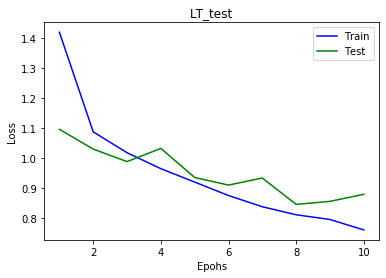

In [41]:
loss = history.history['loss']
epochs = range(1, len(loss)+1)
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b-',label='Train')
plt.plot(epochs, val_loss,'g-',label='Test')
plt.title('LT_test')
plt.xlabel('Epohs')
plt.ylabel('Loss')
plt.legend()
plt.show()

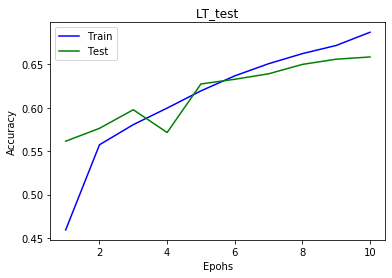

In [42]:
acc = history.history['accuracy']
epochs = range(1, len(acc)+1)
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'b-',label='Train')
plt.plot(epochs, val_acc,'g-',label='Test')
plt.title('LT_test')
plt.xlabel('Epohs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(x_tr,y_tr)
print('訓練資料集準確度:',accuracy,'Loss:',loss)


In [43]:
loss_test, accuracy_test = model.evaluate(x_test,y_test)
print('測試資料集準確度:',accuracy_test,'Loss:',loss_test)

3503/3503 [==============================] - 0s 29us/step
測試資料集準確度: 0.6585783362388611 Loss: 0.8803309839417721
